# Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from prophet import Prophet

C:\Users\Lakshya011\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## Read Data

In [2]:
filename = "C:/Users/Lakshya011/Downloads/Energy-main/Energy-main/data/data.csv"

In [3]:
df = pd.read_csv(filename)

In [4]:
df.count()

datetime       9041
consumption    9041
temp           9041
dtype: int64

In [5]:
df.head()

,datetime,consumption,temp
0,"12/19/2018, 3:00:02 PM",249,69
1,"12/19/2018, 4:00:03 PM",294,69
2,"12/19/2018, 6:00:02 PM",287,69
3,"12/19/2018, 7:00:02 PM",285,69
4,"12/19/2018, 8:00:02 PM",228,69


### Convert index to datetime

In [6]:
df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])
df.head(5)

C:\Users\Lakshya011\AppData\Local\Temp\ipykernel_22300\1436439848.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])


,consumption,temp
datetime,,
2018-12-19 15:00:02,249,69
2018-12-19 16:00:03,294,69
2018-12-19 18:00:02,287,69
2018-12-19 19:00:02,285,69
2018-12-19 20:00:02,228,69


### Verify that no value is null

In [7]:
df.isna().sum()

consumption    0
temp           0
dtype: int64

In [8]:
df['consumption'] = df['consumption'] + 1

In [9]:
min(df.consumption)

1

# Energy Consumption vs Datetime Graph

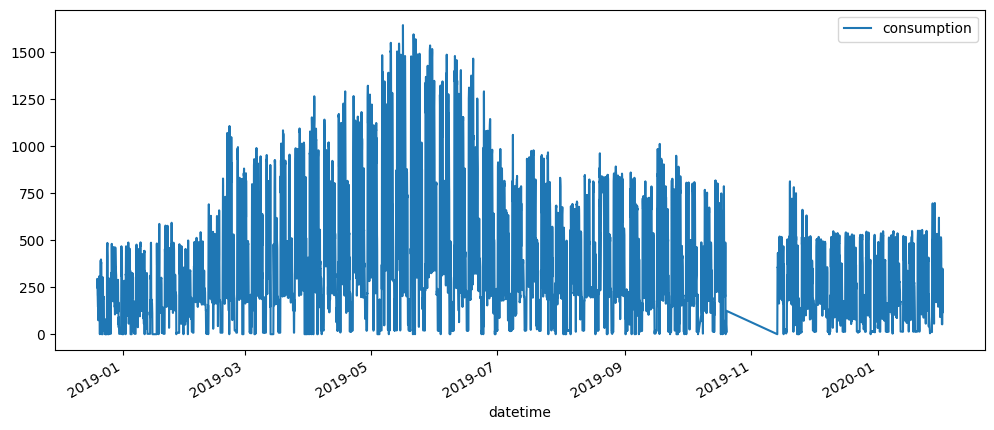

In [10]:
df.plot(y=['consumption'],figsize=(12,5),legend=True)
plt.show()

# Temperature vs Datetime Graph

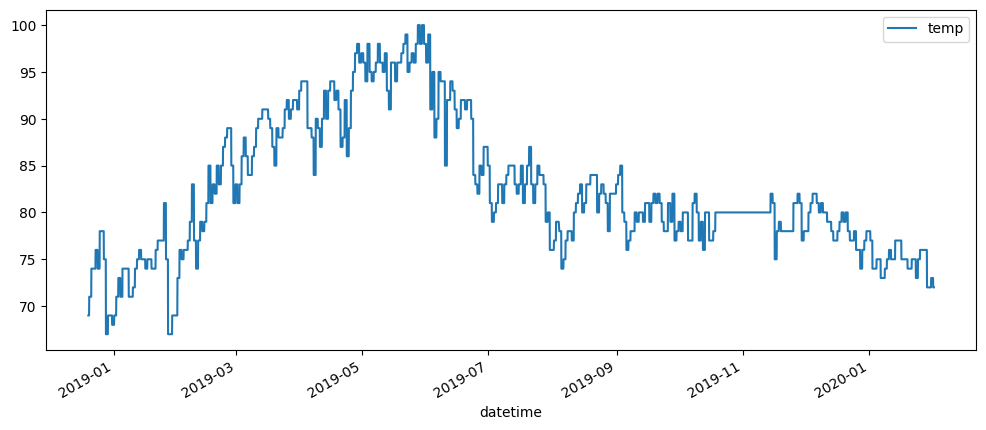

In [11]:
df.plot(y=['temp'],figsize=(12,5),legend=True)
plt.show()

## Maximum Energy Consumption Values

In [12]:
df.nlargest(10,'consumption')

,consumption,temp
datetime,,
2019-05-16 12:00:02,1643,96
2019-05-16 11:00:01,1620,96
2019-05-21 15:00:02,1594,98
2019-05-21 16:00:02,1583,98
2019-05-22 14:00:02,1568,99
2019-05-22 15:00:02,1568,99
2019-05-22 12:00:01,1554,99
2019-05-22 13:00:02,1551,99
2019-05-10 15:00:02,1549,96


# Maximum Temperature Values (in °F)

In [13]:
df.nlargest(10,'temp')

,consumption,temp
datetime,,
2019-05-27 22:00:02,490,100
2019-05-27 23:00:02,484,100
2019-05-28 00:00:02,470,100
2019-05-28 01:00:02,464,100
2019-05-28 02:00:01,422,100
2019-05-28 03:00:02,389,100
2019-05-28 04:00:02,369,100
2019-05-28 05:00:02,304,100
2019-05-28 06:00:02,246,100


In [14]:
df = df.reset_index()

In [15]:
df.count()

datetime       9041
consumption    9041
temp           9041
dtype: int64

## Changing dataframe format specific to Prophet Model

In [16]:
df = df.rename(columns={'datetime':'ds','consumption':'y'})

In [17]:
df.count()

ds      9041
y       9041
temp    9041
dtype: int64

In [18]:
df.nlargest(10,'y')

,ds,y,temp
3502,2019-05-16 12:00:02,1643,96
3501,2019-05-16 11:00:01,1620,96
3625,2019-05-21 15:00:02,1594,98
3626,2019-05-21 16:00:02,1583,98
3648,2019-05-22 14:00:02,1568,99
3649,2019-05-22 15:00:02,1568,99
3646,2019-05-22 12:00:01,1554,99
3647,2019-05-22 13:00:02,1551,99
3361,2019-05-10 15:00:02,1549,96
3650,2019-05-22 16:00:01,1548,99


## Taking log of consumption values

In [19]:
df.y = np.log(df.y)

## Model Fitting

In [20]:
model = Prophet()
model.add_country_holidays(country_name='IN')
model.add_regressor('temp')

C:\Users\Lakshya011\AppData\Roaming\Python\Python312\site-packages\holidays\countries\india.py:103: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)


In [21]:
model.fit(df)

13:28:35 - cmdstanpy - INFO - Chain [1] start processing
13:28:36 - cmdstanpy - INFO - Chain [1] done processing


# List of Holidays 

In [22]:
model.train_holiday_names

0      Makar Sankranti / Pongal
1                  Republic Day
2              Independence Day
3                Gandhi Jayanti
4                    Labour Day
5                        Diwali
6                          Holi
7     Day of Ashura (estimated)
8            Mawlid (estimated)
9       Eid ul-Fitr (estimated)
10      Eid al-Adha (estimated)
11                  Palm Sunday
12                  Good Friday
13                Easter Sunday
14           Feast of Pentecost
15                Christmas Day
dtype: object

## Predictions

In [23]:
prediction=model.predict(df)

In [24]:
org_prediction = prediction.copy()

In [25]:
prediction.nlargest(10,'yhat')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Day of Ashura (estimated),...,temp,temp_lower,temp_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3956,2019-06-04 10:00:02,5.630831,6.031600,9.127785,5.630831,5.630831,0.0,0.0,0.0,0.0,...,0.186025,0.186025,0.186025,0.826181,0.826181,0.826181,0.0,0.0,0.0,7.509772
3957,2019-06-04 11:00:03,5.630828,5.971147,9.081347,5.630828,5.630828,0.0,0.0,0.0,0.0,...,0.186025,0.186025,0.186025,0.796272,0.796272,0.796272,0.0,0.0,0.0,7.507500
3788,2019-05-28 10:00:02,5.631392,5.821647,8.937125,5.631392,5.631392,0.0,0.0,0.0,0.0,...,0.260777,0.260777,0.260777,0.826181,0.826181,0.826181,0.0,0.0,0.0,7.387308
3789,2019-05-28 11:00:01,5.631389,5.860934,8.965913,5.631389,5.631389,0.0,0.0,0.0,0.0,...,0.260777,0.260777,0.260777,0.796289,0.796289,0.796289,0.0,0.0,0.0,7.385088
3958,2019-06-04 12:00:02,5.630824,5.774209,9.005977,5.630824,5.630824,0.0,0.0,0.0,0.0,...,0.186025,0.186025,0.186025,0.762810,0.762810,0.762810,0.0,0.0,0.0,7.376612
3620,2019-05-21 10:00:02,5.607276,5.726211,8.827476,5.607276,5.607276,0.0,0.0,0.0,0.0,...,0.230876,0.230876,0.230876,0.826181,0.826181,0.826181,0.0,0.0,0.0,7.333291
3621,2019-05-21 11:00:02,5.607449,5.760630,8.958562,5.607449,5.607449,0.0,0.0,0.0,0.0,...,0.230876,0.230876,0.230876,0.796280,0.796280,0.796280,0.0,0.0,0.0,7.331221
3961,2019-06-04 15:00:02,5.630814,5.711213,8.786343,5.630814,5.630814,0.0,0.0,0.0,0.0,...,0.186025,0.186025,0.186025,0.647601,0.647601,0.647601,0.0,0.0,0.0,7.298443
3955,2019-06-04 09:00:02,5.630834,5.763026,8.779816,5.630834,5.630834,0.0,0.0,0.0,0.0,...,0.186025,0.186025,0.186025,0.851867,0.851867,0.851867,0.0,0.0,0.0,7.283422
3962,2019-06-04 16:00:02,5.630811,5.718429,8.846467,5.630811,5.630811,0.0,0.0,0.0,0.0,...,0.186025,0.186025,0.186025,0.606476,0.606476,0.606476,0.0,0.0,0.0,7.270711


### Let's check for effect of Gandhi Jayanti on Energy consumption value

In [26]:
prediction.nlargest(10,'Gandhi Jayanti')[['ds','Gandhi Jayanti']]

,ds,Gandhi Jayanti
6752,2019-10-02 00:00:01,0.026672
6753,2019-10-02 01:00:02,0.026672
6754,2019-10-02 02:00:01,0.026672
6755,2019-10-02 03:00:02,0.026672
6756,2019-10-02 04:00:02,0.026672
6757,2019-10-02 05:00:02,0.026672
6758,2019-10-02 06:00:02,0.026672
6759,2019-10-02 07:00:02,0.026672
6760,2019-10-02 08:00:01,0.026672
6761,2019-10-02 09:00:02,0.026672


# Actual vs Predicted Energy Values Plot
Black points represents the actual values, blue  points represents the predicted values and the light blue margin represents the lower and upper bound of predicted values for certain points.

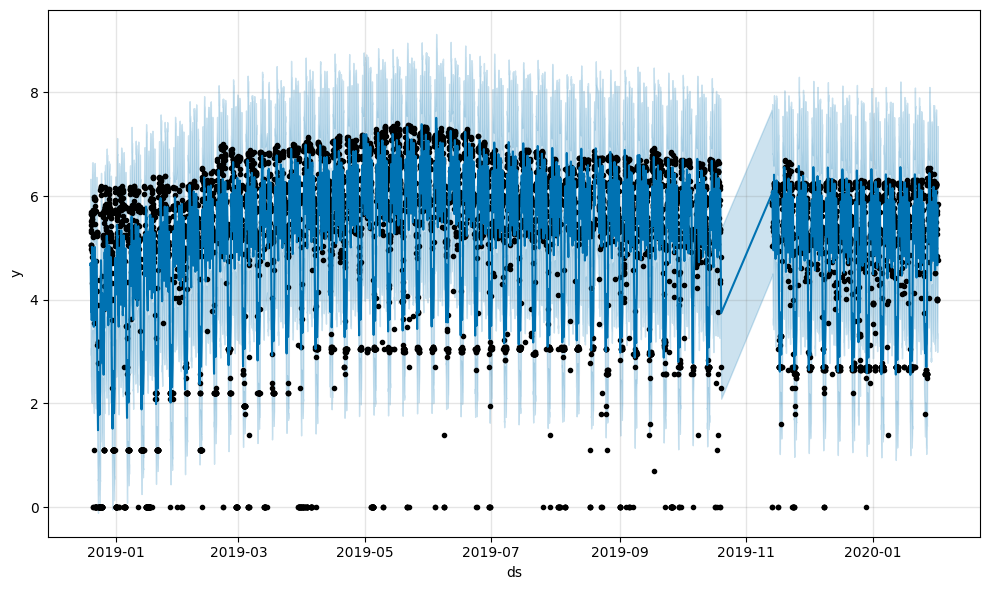

In [26]:
fig = model.plot(prediction)

## Monthly, Daywise and Timewise distribution

The values in the graph basically represents the effect of values corresponding to x-axis on result predicted on y-axis

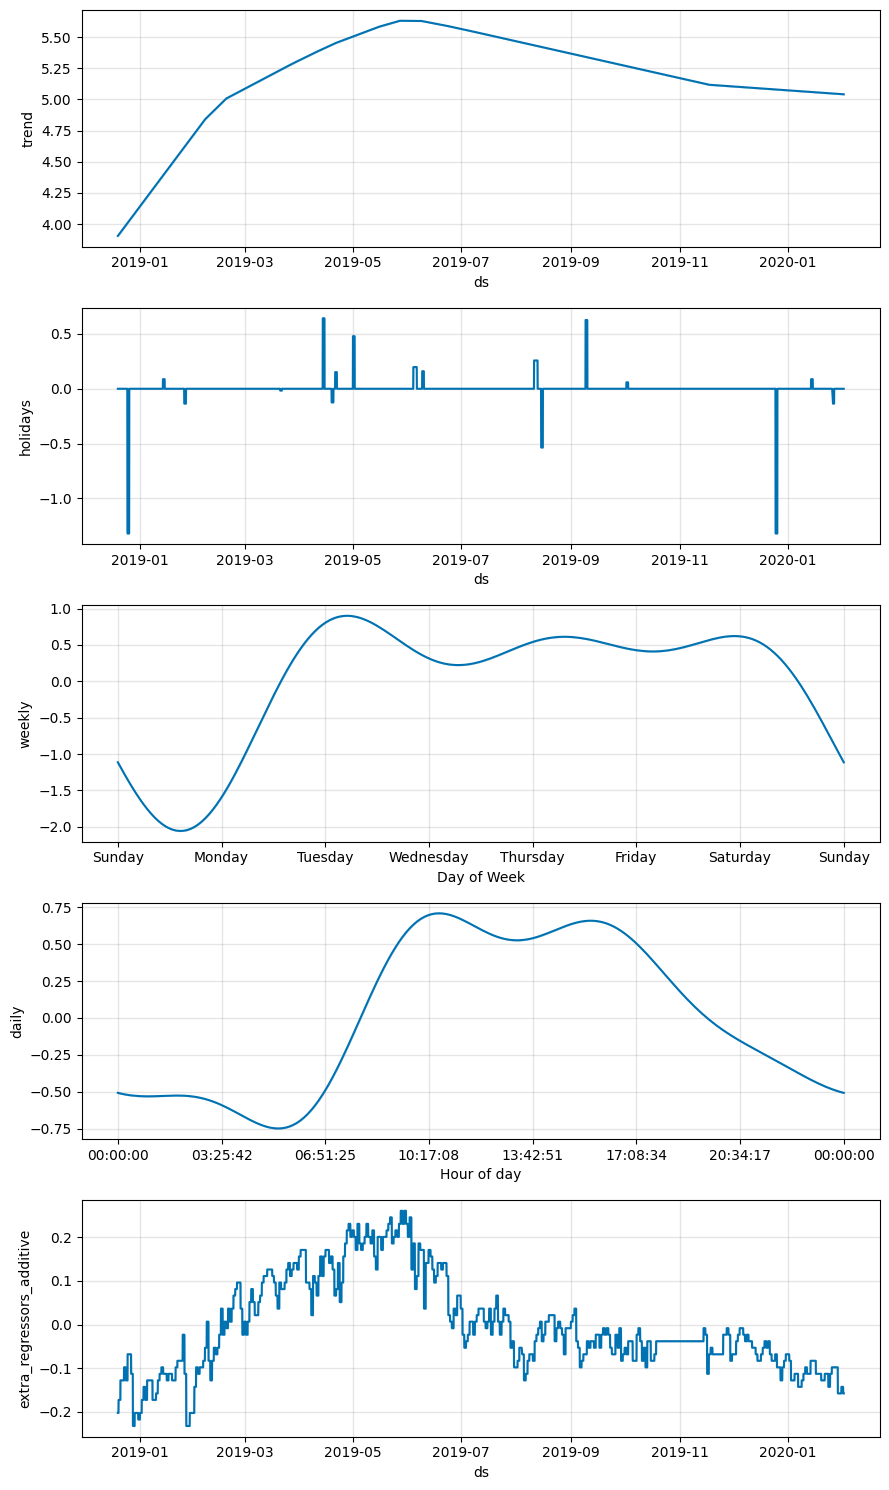

In [27]:
fig = model.plot_components(prediction)

In [28]:
df.head()

,ds,y,temp
0,2018-12-19 15:00:02,5.521461,69
1,2018-12-19 16:00:03,5.686975,69
2,2018-12-19 18:00:02,5.662960,69
3,2018-12-19 19:00:02,5.655992,69
4,2018-12-19 20:00:02,5.433722,69


In [29]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Day of Ashura (estimated),...,temp,temp_lower,temp_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-19 15:00:02,3.905380,2.942796,6.333350,3.905380,3.905380,0.0,0.0,0.0,0.0,...,-0.202687,-0.202687,-0.202687,0.331734,0.331734,0.331734,0.0,0.0,0.0,4.670653
1,2018-12-19 16:00:03,3.906174,3.061394,6.223506,3.906174,3.906174,0.0,0.0,0.0,0.0,...,-0.202687,-0.202687,-0.202687,0.355138,0.355138,0.355138,0.0,0.0,0.0,4.708234
2,2018-12-19 18:00:02,3.907763,2.848042,6.073181,3.907763,3.907763,0.0,0.0,0.0,0.0,...,-0.202687,-0.202687,-0.202687,0.404188,0.404188,0.404188,0.0,0.0,0.0,4.424531
3,2018-12-19 19:00:02,3.908557,2.525652,5.925856,3.908557,3.908557,0.0,0.0,0.0,0.0,...,-0.202687,-0.202687,-0.202687,0.429014,0.429014,0.429014,0.0,0.0,0.0,4.225226
4,2018-12-19 20:00:02,3.909351,2.509405,5.730407,3.909351,3.909351,0.0,0.0,0.0,0.0,...,-0.202687,-0.202687,-0.202687,0.453500,0.453500,0.453500,0.0,0.0,0.0,4.078907


## Errors

In [30]:
true_val = np.exp(df.y)

In [31]:
pred_val = np.exp(org_prediction['yhat'])

In [32]:
mean_squared_error(y_true=true_val,y_pred=pred_val)

np.float64(40668.22150692098)

In [33]:
mean_absolute_error(y_true=true_val,y_pred=pred_val)

np.float64(137.41290485581817)

## Prediction

In [34]:
data = ['2019-05-16 12:00:00']
test = pd.DataFrame(data, columns = ['ds']) 

In [35]:
test['temp'] = 80

In [36]:
test

,ds,temp
0,2019-05-16 12:00:00,80


In [37]:
val = model.predict(test)

In [38]:
val

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Day of Ashura (estimated),...,temp,temp_lower,temp_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-05-16 12:00:00,5.586871,5.1012,8.300116,5.586871,5.586871,0.0,0.0,0.0,0.0,...,-0.038232,-0.038232,-0.038232,0.586735,0.586735,0.586735,0.0,0.0,0.0,6.734609


In [39]:
np.exp(val['yhat'])

0    841.015001
Name: yhat, dtype: float64

## Saving Model

In [40]:
type(model)

prophet.forecaster.Prophet

In [41]:
pkl_path = "C:/Users/Lakshya011/Downloads/Energy-main/Energy-main/src/models/model.pkl"

In [42]:
model.stan_backend.logger = None

In [43]:
with open(pkl_path, 'wb') as fout:
    pickle.dump(model, fout)

In [44]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)